In [1]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from PIL import Image
from IPython.core.display import HTML
from functools import partial

from engine.utils import ProgramGenerator, ProgramInterpreter
from prompts.gqa import create_prompt

c:\Users\Sheryl\anaconda3\envs\visprog\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
interpreter = ProgramInterpreter(dataset='gqa')

Registering LOC step
Registering COUNT step
Registering CROP step
Registering CROP_RIGHTOF step
Registering CROP_LEFTOF step
Registering CROP_FRONTOF step
Registering CROP_INFRONTOF step
Registering CROP_INFRONT step
Registering CROP_BEHIND step
Registering CROP_AHEAD step
Registering CROP_BELOW step
Registering CROP_ABOVE step
Registering VQA step
Registering EVAL step
Registering RESULT step
Registering ACT step
Registering WEBLOC step
Registering ID step
Registering CONT step


AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 0 | SSE3 = 1 | VSX = 0 | 


In [4]:
prompter = partial(create_prompt,method='random', num_prompts=2)
generator = ProgramGenerator(prompter=prompter)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 0 | SSE3 = 1 | VSX = 0 | 


In [4]:
image = Image.open('../assets/cust_reviews.png')
# image.thumbnail((640,640),Image.Resampling.LANCZOS)
init_state = dict(
    IMAGE=image.convert('RGB')
)
image.size

(1280, 720)

In [6]:
question = "How many people or animals are in the image?"
# question = "Are there more animals than people in the image?"
# question = "Localize the woman and tell me the color of her dress."
# question = "Find and tell me the name of the animal in the image."
# question = "How many women are to the right of the camel?"
# question = "How many women are to the left of the camel?"
# question = "Is the lamp to the left of the woman lit?"
# question = "Is there a sun in the sky?"

prog,_ = generator.generate_llama(dict(question=question))
print(prog)

Think step by step to answer the question.

Question: Which place is it?
Program:
ANSWER0=VQA(image=IMAGE,question='Which place is it?')
FINAL_RESULT=RESULT(var=ANSWER0)

Question: Is the vehicle in the top of the image?
Program:
BOX0=LOC(image=IMAGE,object='TOP')
IMAGE0=CROP(image=IMAGE,box=BOX0)
BOX1=LOC(image=IMAGE0,object='vehicle')
ANSWER0=COUNT(box=BOX1)
ANSWER1=EVAL(expr="'yes' if {ANSWER0} > 0 else 'no'")
FINAL_RESULT=RESULT(var=ANSWER1)

Question: How many people or animals are in the image?
Program:
ANSWER0=VQA(image=IMAGE,object='TOP')
IMAGE0=CROP(image=IMAGE,box=BOX0)
BOX1=LOC(image=IMAGE0,object='veh


In [14]:
prog = "BOX0=LOC(image=IMAGE,object='people')\nBOX1=LOC(image=IMAGE,object='animals')\nANSWER0=COUNT(box=BOX0)\nANSWER1=COUNT(box=BOX1)\nANSWER2=EVAL(expr=\"{ANSWER0} + {ANSWER1}\")\nFINAL_RESULT=RESULT(var=ANSWER2)"

In [5]:
prog = "BOX0=LOC(image=IMAGE,object='TOP')\nIMAGE0=CROP(image=IMAGE,box=BOX0)\nBOX1=LOC(image=IMAGE0,object='person')\nANSWER0=COUNT(box=BOX1)\nFINAL_RESULT=RESULT(var=ANSWER0)"

In [5]:
import regex as re

tree = "[1402] StaticText 'SKU'\t\
		[1510] StaticText 'B086GNDL8K'\t\
		[1340] LayoutTable ''\t\
			[1512] StaticText 'Rating:'\t\
			[1405] generic '75%'\t\
				[2324] StaticText '% of'\t\
				[2327] StaticText '100'\t\
			[1406] link '12\xa0 Reviews '\t\
			[1407] link 'Add Your Review'\t\
		[1409] StaticText '$19.99'\t\
		[44] generic 'Color * Black & Blue Black & Gold Black & Red White & Gold White & Rose Gold'\t\
			[49] radio 'Black & Blue' checked: false\t\
			[51] radio 'Black & Gold' checked: false\t\
			[53] radio 'Black & Red' checked: false"
tree = re.sub("\'", "", tree)
tree

'[1402] StaticText SKU\t\t\t[1510] StaticText B086GNDL8K\t\t\t[1340] LayoutTable \t\t\t\t[1512] StaticText Rating:\t\t\t\t[1405] generic 75%\t\t\t\t\t[2324] StaticText % of\t\t\t\t\t[2327] StaticText 100\t\t\t\t[1406] link 12\xa0 Reviews \t\t\t\t[1407] link Add Your Review\t\t\t[1409] StaticText $19.99\t\t\t[44] generic Color * Black & Blue Black & Gold Black & Red White & Gold White & Rose Gold\t\t\t\t[49] radio Black & Blue checked: false\t\t\t\t[51] radio Black & Gold checked: false\t\t\t\t[53] radio Black & Red checked: false'

In [6]:
prog = "BOX0=WEBLOC(image=IMAGE,object='review')\n\
IMAGE0=CROP(image=IMAGE,box=BOX0)\n\
ID0=ID(image=IMAGE0,accessibility_tree='{}')\n\
ACT0=ACT(id=ID0)\n\
FINAL_RESULT=RESULT(var=ID0)".format(tree)
prog
# ANSWER0=VQA(image=IMAGE0,question='What action should I take to answer the question: List out reviewers, if exist, who mention about ear cups being small? Choose from scroll up, scroll down, click, go back, stop.')\n\

"BOX0=WEBLOC(image=IMAGE,object='review')\nIMAGE0=CROP(image=IMAGE,box=BOX0)\nID0=ID(image=IMAGE0,accessibility_tree='[1402] StaticText SKU\t\t\t[1510] StaticText B086GNDL8K\t\t\t[1340] LayoutTable \t\t\t\t[1512] StaticText Rating:\t\t\t\t[1405] generic 75%\t\t\t\t\t[2324] StaticText % of\t\t\t\t\t[2327] StaticText 100\t\t\t\t[1406] link 12\xa0 Reviews \t\t\t\t[1407] link Add Your Review\t\t\t[1409] StaticText $19.99\t\t\t[44] generic Color * Black & Blue Black & Gold Black & Red White & Gold White & Rose Gold\t\t\t\t[49] radio Black & Blue checked: false\t\t\t\t[51] radio Black & Gold checked: false\t\t\t\t[53] radio Black & Red checked: false')\nACT0=ACT(id=ID0)\nFINAL_RESULT=RESULT(var=ID0)"

In [6]:
import regex as re

tree2 = "Tab 0 (current): 6S Wireless Headphones Over Ear,Noise Canceling Hi-Fi Bass Foldable Stereo Wireless Kid Headsets Earbuds with Built-in Mic, Micro SD/TF, FM for iPhone/Samsung/iPad/PC (Black & Gold)\t\
[1] RootWebArea '6S Wireless Headphones Over Ear,Noise Canceling Hi-Fi Bass Foldable Stereo Wireless Kid Headsets Earbuds with Built-in Mic, Micro SD/TF, FM for iPhone/Samsung/iPad/PC (Black & Gold)' focused: True\t\
	[5] main ''\t\
		[1419] StaticText 'Skip to the beginning of the images gallery'\t\
		[1177] tablist '' multiselectable: False orientation: horizontal\t\
			[1178] tab 'Details' expanded: False selected: False controls: description\t\
				[1420] link 'Details'\t\
			[1180] tab 'Reviews (12)' expanded: True selected: True controls: reviews\t\
				[1422] link 'Reviews (12)'\t\
			[2425] tabpanel 'Reviews (12)'\t\
				[2546] StaticText 'Customer Reviews'\t\
				[2633] StaticText 'Great'\t\
				[2597] LayoutTable ''\t\
					[2634] LayoutTableRow ''\t\
						[2799] LayoutTableCell 'Rating'\t\
						[2800] generic '100%'\t\
				[2637] StaticText 'I got these for working out and they are great! I’ve had them for about two months and use them 5-6 times a week. The battery lasts forever, I usually only charge once every one to two weeks.'\t\
				[2640] StaticText 'Review by '\t\
				[2642] StaticText 'Jenna Kaufman'\t\
				[2645] StaticText 'Posted on '\t\
				[2646] time ''\t\
					[2801] StaticText '4/20/23'\t\
				[2647] StaticText 'Love these headphones'\t\
				[2600] LayoutTable ''\t\
					[2648] LayoutTableRow ''\t\
						[2802] LayoutTableCell 'Rating'\t\
						[2803] generic '100%'\t\
				[2651] StaticText 'This headphone is wonderful. I have tried several earbuds, headbands with speaker inserts, and over ear with disappointing sound quality and volume control or difficulty using. Not so with this product. The sound quality is fantastic and I have no problem controlling and adjusting volume! I am able to connect easily with a windows laptop, chrome book laptop, IPAD, and several different android tablets.The written instructions come in a number of different languages, type fits are a bit small for my tired ancient eyes, but fortunately, operation is extremely simple.'\t\
				[2654] StaticText 'Review by '\t\
				[2656] StaticText 'Joseph Brzezinski'\t\
				[2659] StaticText 'Posted on '\t\
				[2660] time ''\t\
					[2804] StaticText '4/20/23'\t\
				[2661] StaticText 'Too small, did not hold charge.'\t\
				[2603] LayoutTable ''\t\
					[2662] LayoutTableRow ''\t\
						[2805] LayoutTableCell 'Rating'\t\
						[2806] generic '20%'"

tree2 = re.sub("\'", "", tree2)
prog = "BOX0=CONT(tree={},object='review by')\n\
IMAGE0=CROP(image=IMAGE,box=BOX0)\n\
ANSWER0=VQA(image=IMAGE0, question='Does this review mention about ear cups being too small?')\n\
FINAL_RESULT=RESULT(var=ANSWER0)".format(tree2)
prog

"BOX0=WEBLOC(image=IMAGE,object='review by')\nIMAGE0=CROP(image=IMAGE,box=BOX0)\nANSWER0=VQA(image=IMAGE0, question='Does this review mention about ear cups being too small?')\nFINAL_RESULT=RESULT(var=ANSWER0)"

In [7]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)

WEBLOC
CROP
VQA
RESULT


c:\Users\Sheryl\anaconda3\envs\visprog\lib\site-packages\transformers\generation\utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [7]:
result

'stop'


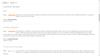
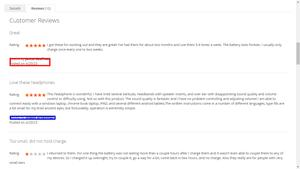
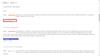
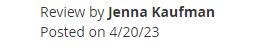

In [8]:
HTML(html_str)

In [12]:
from unstructured.partition.html import partition_html

elements = partition_html(filename="../assets/headphones.html")
for element in elements:
    print(element)
    # metadata = element.metadata.to_dict()
    # if "emphasized_text_contents" in metadata:
    #     print(metadata["emphasized_text_contents"])

6S Wireless Headphones Over Ear,Noise Canceling Hi-Fi Bass Foldable Stereo Wireless Kid Headsets Earbuds with Built-in Mic, Micro SD/TF, FM for iPhone/Samsung/iPad/PC (Black & Gold)
In stock
B086GNDL8K
Rating:
75                         % of 100
12 
                Reviews
Add Your Review
$19.99
Color
Black & Blue
Black & Gold
Black & Red
White & Gold
White & Rose Gold
Qty
Add to Cart
Add to Wish List
Add to Compare
Skip to the end of the images gallery
Skip to the beginning of the images gallery
Details
Product Quick Look
♫[ Hi-Fi Bass Sound]:Powerful 57mm stereo driver and advanced bluetooth 4.2 chip that aim to deliver you superior sound quality with high fidelity deep bass and crystal clear treble, lose yourself in immersive music even in the lowest volume levels!
♫[Super Features]: Wireless and wired flexible headphones,if the battery is low, you can switch to wired mode and enjoy music with a 3.5mm audio cable . Use FM radio and support SD card playback. You can listen to the FM 

In [20]:
from unstructured.partition.image import partition_image
image = Image.open('../assets/temp.png')
image.thumbnail((image.size[0]/2,image.size[1]/2),Image.Resampling.LANCZOS)
image.save('../assets/temp2.png')
elements = partition_image('../assets/temp.png', strategy='ocr_only')

for element in elements:
    metadata = element.metadata.to_dict()
    print(element.text)

kkk 12 Reviews Add Your Review


In [26]:
from unstructured.partition.image import partition_image
import unstructured_pytesseract

unstructured_pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Sheryl\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

elements = partition_image("../assets/headphones.png")

bbox = []

for element in elements:
    metadata = element.metadata.to_dict()
    print(element.text)
    if "review" in element.text.lower():
        x1 = metadata['coordinates']['points'][0][0]
        y1 = metadata['coordinates']['points'][0][1]
        y2 = metadata['coordinates']['points'][1][1]
        x2 = metadata['coordinates']['points'][2][0]
        bbox = [x1, y1, x2, y2]
print(bbox)

My Account My Wish List Sign In Welcome to One Stop Market Create an Account
One Stop Market
=
Advanced Search
Beauty & Personal Care
Sports & Outdoors
Clothing, Shoes & Jewelry Office Products Tools & Home Improvement
& Household Patio, Lawn & Garden Electronics Cell Phones & Accessories Video Games Grocery & Gourmet
Health
Food
Home
Nireless Headphone er Ear,Noise Canceling Hi-Fi Bass Foldable Stere: h Built-in M cro SD/TF, FM for iPhone/Samsung/iPad/PC (Black ; e
& Gold
6S Wireless Headphones Over Ear,Noise Canceling Hi-Fi Bass Foldable Stereo Wireless Kid Headsets Earbuds with Built-in Mic, Micro SD/TF, FM for iPhone/Samsung/iPad/PC (Black & Gold)
INSTOCK SKU BO86GNDL8K
Keke kw Wk 12 Reviews Add Your Review
$19.99
Bluetooth Fast Connection
Color *
C) O Black & Blue
Using bluetooth core technology, transmission speed, easy to enjoy music
fa) O Black & Gold
O Black & Red
O white & Gold
O White & Roce Gold
[746.9425659179688, 507.1411437988281, 1047.1488037109375, 523.8338623046875]


In [29]:
import torch 
import torchvision 
from torchvision.io import read_image 
from torchvision.utils import draw_bounding_boxes 
  
# read input image from your computer 
img = read_image('../assets/headphones.png') 
print(img.shape)
img = img[:3]
  
# bounding box are xmin, ymin, xmax, ymax 
box = torch.tensor(bbox) 
box = box.unsqueeze(0) 
  
# draw bounding box and fill color 
img = draw_bounding_boxes(img, box, width=5, 
                          colors="green",  
                          fill=True) 
  
# transform this image to PIL image 
img = torchvision.transforms.ToPILImage()(img) 
  
# display output 
img.show()

torch.Size([4, 720, 1280])
